# Practical Pandas with Ozone Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../data/ozone.csv')

#### What are the column names in this dataset?

In [2]:
data.columns

Index([u'Ozone', u'Solar.R', u'Wind', u'Temp', u'Month', u'Day'], dtype='object')

In [3]:
list(data.columns)

['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day']

####  What are the data types?

In [4]:
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp         int64
Month        int64
Day          int64
dtype: object

####  Extract the first 5 rows of the data frame.

In [5]:
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


####  Extract the first 2 rows of the data frame.

In [6]:
data.head(2)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2


In [7]:
data.iloc[0:2]

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2


####  Extract the 1st and 3rd rows of the data frame.

In [8]:
data.iloc[[0,2]]

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
2,12.0,149.0,12.6,74,5,3


####  How many observations (i.e. rows) are in this data frame?

In [9]:
len(data)

153

In [10]:
# number of rows x columns
data.shape 

(153, 6)

#### Extract the last 2 rows of the data frame.

In [11]:
data.tail(2)

,Ozone,Solar.R,Wind,Temp,Month,Day
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


In [12]:
data.iloc[151:]

,Ozone,Solar.R,Wind,Temp,Month,Day
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


####  What is the value of Ozone in the 47th row?

In [13]:
data.Ozone[46]

21.0

In [14]:
data['Ozone'][46]

21.0

In [15]:
data.ix[46]

Ozone       21.0
Solar.R    191.0
Wind        14.9
Temp        77.0
Month        6.0
Day         16.0
Name: 46, dtype: float64

####  How many missing values are in the Ozone column of this data frame?

In [16]:
data.Ozone.isnull().sum()

37

In [17]:
# real values
data.Ozone.notnull().sum()

116

#### What is the mean of the Ozone column in this dataset?

In [18]:
data.Ozone.mean() 

42.12931034482759

In [19]:
# Excludes missing values (coded as NA)
data[data.Ozone.notnull()].Ozone.mean()

42.12931034482759

####  Extract the subset of rows of the data frame where Ozone values are above 31 and Temp values are above 90. What is the mean of Wind in this subset?

In [20]:
# and query
data2 = data[(data.Ozone > 31) & (data.Temp > 90)]
data2.Wind.mean()

5.6

In [21]:
# or query
data3 = data[(data.Ozone > 31) | (data.Temp > 90)]
data3.Wind.mean()

8.477419354838709

In [22]:
data[(data.Ozone > 31) & (data.Temp > 90)]

,Ozone,Solar.R,Wind,Temp,Month,Day
68,97.0,267.0,6.3,92,7,8
69,97.0,272.0,5.7,92,7,9
119,76.0,203.0,9.7,97,8,28
120,118.0,225.0,2.3,94,8,29
121,84.0,237.0,6.3,96,8,30
122,85.0,188.0,6.3,94,8,31
123,96.0,167.0,6.9,91,9,1
124,78.0,197.0,5.1,92,9,2
125,73.0,183.0,2.8,93,9,3
126,91.0,189.0,4.6,93,9,4


In [23]:
data[(data.Ozone > 31) & (data.Temp > 90)].mean()

Ozone       89.5
Solar.R    212.8
Wind         5.6
Temp        93.4
Month        8.2
Day         14.5
dtype: float64

In [24]:
data[(data.Ozone > 31) & (data.Temp > 90)].Wind.mean()

5.6

####  How about Solar.R?

In [25]:
data[(data.Ozone > 31) & (data.Temp > 90)]['Solar.R']

68     267.0
69     272.0
119    203.0
120    225.0
121    237.0
122    188.0
123    167.0
124    197.0
125    183.0
126    189.0
Name: Solar.R, dtype: float64

In [26]:
data[(data.Ozone > 31) & (data.Temp > 90)]['Solar.R'].mean()

212.8

#### What is the mean of "Temp" when "Month" is equal to 6?

In [27]:
data[data.Month == 6].Temp.mean()

79.1

####  What was the maximum ozone value in the month of May (i.e. Month = 5)?

In [28]:
data[data.Month == 5].Ozone.max()

115.0

In [29]:
# max of both ozone and temp during month of may
data[data.Month == 5][['Ozone','Temp']].max()

Ozone    115.0
Temp      81.0
dtype: float64

#### What are the unique values for 'Month'?

In [30]:
data.Month.unique()

array([5, 6, 7, 8, 9])

#### What is mean Temp for each month?

In [31]:
data.groupby('Month').Temp.mean()

Month
5    65.548387
6    79.100000
7    83.903226
8    83.967742
9    76.900000
Name: Temp, dtype: float64

#### Plot a histogram for Temp for the month of May

(array([ 16.,  23.,  46.,  49.,  19.]),
 array([ 56. ,  64.2,  72.4,  80.6,  88.8,  97. ]),
 <a list of 5 Patch objects>)

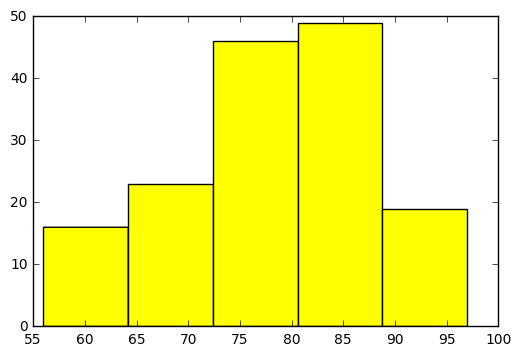

In [32]:
plt.hist(data.Temp, 5, color="yellow")

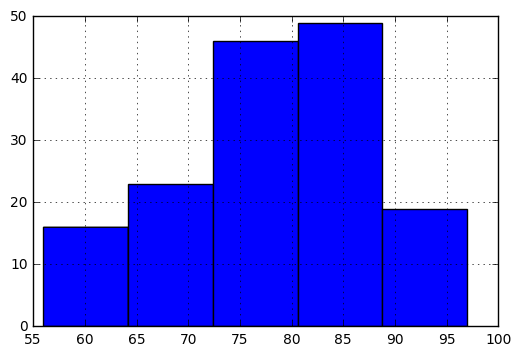

In [33]:
data.Temp.hist(bins=5)

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with eamples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas